Lecture Notes for session conducted on August 22, 2022

https://www.scaler.com/academy/mentee-dashboard/class/35630/session

**Content**
1.   Quick Recap: Auto Regressive Moving Average ARMA($p$,$q$).
2.   Code: Auto Regressive model AR($p$).
3.   Code: Moving Average model MA($q$).
5.   Code: Auto Regressive Integrated Moving Average ARIMA ($p$,$q$,δ).
6.   Seasonal-ARIMA ($p$,$q$,δ,$s$,$P$,$Q$,$D$).
7.   SARIMAX.
8.   FB-Prophet.


### Quick Recap of ARMA ($p$,$q$):


Typically, we combine AR($p$) and MA($q$) to form ARMA model.

#### Mathematical Representation:

- Ideally $\hat{y}_{t+1}$ is computed as:
$$\hat{y}_{t+1} = Constant + (\sum_{i=t}^{t-p} \alpha_{i} y_{i}) + (\sum_{j=t}^{t-q} \theta_{j} \epsilon_{j}) $$
- $\epsilon_{j}$ is computed as $y_j-\hat{y}_j$
<img src='https://drive.google.com/uc?id=1ZBW2zVN9UVpeTqnwiy79xgAXDqTL-9KD'>

- Here, $\alpha_{i}$ and $\theta_{j}$ are parameters where $p \ \alpha_{i}'s$ are doing auto regression using last $p$ values and have a simple moving average model on errors.

### Differencing a Time Series:

What is derivative of Time Series with respect to time?

##### $1^{st}$ order derivative:

- $1^{st}$ order derivative is computed as:
$$\frac{dy}{dt} \bigg\vert_t = y'_t = y_t - y_{t-1} \tag 1$$
- This is similar to $\underset{\Delta_{t}\to0}{lim} \frac{\Delta_{y}}{\Delta_{t}}$
    <img src='https://drive.google.com/uc?id=1m4oM1PVlKHiZ1Nh7kkKCZizQNOipeufi'>
- The equation could also be written as:
$$y_t = y'_t + y_{t-1}$$

##### $2^{nd}$ order derivative:

- If we take $2^{nd}$ order derivative it looks like:
\begin{equation}
  \begin{aligned}
    y^{''}_t & = \frac{dy'}{dt} \bigg\vert_t \\
        & = y'_t - y'_{t-1} \\
        & = [y_t - y_{t-1}] - [y_{t-1} - y_{t-2}] \\
  \therefore \   y^{''}_t & = y_t - 2 \ y_{t-1} + y_{t-2}\\     
  \end{aligned}
\end{equation}
    <img src='https://drive.google.com/uc?id=1Qe1dVh-G2Gbz7_zG5wXz6cIvAactq7qu'>
- We can compute $1^{st}$ order derivative as $y_t - y_{t-1}$.
- Similarly, we can compute $2^{nd}$ order derivative using $y_t, y_{t-1}, y_{t-2}$.
- Thus we can calculate $d^{th}$ order derivative using similar logic. We would require, $y_t,y_{t-1},...y_{t-d}$.

***Note:***

Imagine we have a Time Series $...y_t....$ We can get $1^{st}$ order derivative using differencing $y'_t$. This is sort of de-trending Time Series.

#### Auto Regressive model AR($p$):

##### Mathematical Representation:

- Ideally $y_t$ is computed as:
$$y_t = \mu + \alpha_{1} \ y_{t-1} + \alpha_{2} \ y_{t-2} +....+ \alpha_{p} \ y_{t-p} + \epsilon_{t}$$
<img src='https://drive.google.com/uc?id=1UnNF_ZXGv6KbRnZ-wSAaGoB8yeSDyYxJ'>  
- Here $\mu$ could be thought of as intercept, $\alpha_{1}, \alpha_{2}.. \alpha_{p}$ as weights.
- $\epsilon_{t}$ is error term and $\mu + \alpha_{1} \ y_{t-1} + \alpha_{2} \ y_{t-2} +....+ \alpha_{p} \ y_{t-p}$ is $\hat{y}$.
- In this model $\alpha_{1}, \alpha_{2}.. \alpha_{p}$ and $\mu$ are parameters and $p$ is hyper-parameter.

##### Comparison of SES and AR($p$):

- In SES, weighted average is exponential and determined using $\alpha$. Here, $\alpha$ is hyper-parameter.
- In AR($p$), weighted average is learnt and $p$ is hyper-parameter.
<img src='https://drive.google.com/uc?id=1qJm3g_7xoQ_LMnWBYWfVH7RYHD_1KEXF'>  


##### Train/Test data setup for AR($p$):

- Here, we have $y_0....y_t$. From this we construct $x_i's$ and $y_i's$.
<img src='https://drive.google.com/uc?id=1f2lmcEZ9X3WXfYW8R9VwC_mXsdg_NZMa'>  
- If we have 1000 datapoints and $p$ = 10, then we can prepare 990 rows of data.

#### Moving Average MA($q$):

Moving Average is Linear Regression model of last $q$ errors.

##### Mathematical Representation:

- Ideally $y_t$ is computed as:
$$y_t = \epsilon_{t} + \mu + \theta_{1} \ \epsilon_{t-1} + \theta_{2} \ \epsilon_{t-2} +....+ \theta_{q} \ \epsilon_{t-q}$$
<img src='https://drive.google.com/uc?id=1Ej_CHWCSsPZntKx0lITxlWs3prYAZBkZ'>  
- Here $\mu$ is average of all $y_i's$ in train Time Series.
- $\epsilon_{t-i} = y_{t-i} - \hat{y}_{t-i}$.

#### Auto Regressive Moving Average MA($p,q$):

Typically, we combine AR($p$) and MA($q$). This is ARMA model.

##### Mathematical Representation:

- Ideally $y_t$ is computed as:
$$y_t = \epsilon_{t} + \mu + (\sum_{i=1}^p \alpha_{i} y_{t-i}) + (\sum_{j=1}^q \theta_{j} \epsilon_{t-j}) $$
<img src='https://drive.google.com/uc?id=1eBi_xo27BhV8TrovmywVrt6ydh4pf2bI'>
- Here, $\alpha_{i}$ and $\theta_{j}$ are parameters where $p \ \alpha_{i}'s$ are doing auto regression using last $p$ values and a simple moving average model on errors.

### Auto Regressive Integrated Moving Average ARIMA ($p$, $q$, $\delta$).

- In last class we saw that '$I$' stands for Integration in ARIMA.
    <img src='https://drive.google.com/uc?id=1-WEoNsu8kH4B-b_Vsu_XsCB2jYq6Gha6'>
- Differencing is same as differentiation. Differencing gives a lot of information and it was done to make Time Series Stationary.

*Note:*

Opposite of differentiation is Integration.

- ARIMA model has parameters $p,q,\delta$ where:
$$p: \ represents \ number \ of \ terms \ in \ Auto \ Regressor \ \sum_{i=t}^{t-p} \alpha_i y_i$$
$$q: \ represents \ number \ of \ terms \ in \ Moving \ Average \ \sum_{i=t}^{t-q} \theta_j \epsilon_j$$
$$\delta: \ Order \ of \ differentiation$$

    <img src='https://drive.google.com/uc?id=1c3s7Gsdpp9MYQMOXBYYSx5HNe_XZgl0H'>

#### Internal Working of ARIMA:

- Let ARIMA($p$=3, $\delta$=1, $q$=3) and we have dataset: $y_0, y_1,...y_t$
<img src='https://drive.google.com/uc?id=1tTR-NC9Q_cUcai0lZZOArk1q_N15DA4a'>
- First, we will do differencing or de-trending using $1^{st}$ order derivative. We will get:
$$y'_1,y'_2,... y'_t$$
- Note that this need not be of length $t$. This is because we would need $y_{-1}$ to compute $y'_0$.
- We will fit this de-trended data on ARMA($p$=3, $q$=3). This means, we have bunch of parameters determined using optimization methods. This is similar to Linear Regression.
- It captures trend using AR and MA but it does not capture seasonality.
- Simply put, ARIMA($p$, $\delta$, $q$) is detrending Times Series using differencing via $d^{th}$ order differentiation and Linear Regression on last $p$ $y_i's$ and last $q$ $\epsilon_j's$.

#### How to determine $p,q,\delta$:

- There are some heuristics (guidelines) developed using ACF/PACF plots to determine these values.
  <img src='https://drive.google.com/uc?id=1pI-OKfb58Q8OyJcxSQDOGYV01z39dkVo'>
- Note, that this was done by Statisticians in an era with limited computational resources.
- In Modern days, these could be treated as hyper parameters and determined accordingly.

***Question:*** In which scenario of Time Series, can we use $2^{nd}$ order derivative?

***Answer:***
If a Time Series has some linear trend line, then $\delta$=1 would work. But if we have a quadratic trend line, then $\delta$=2 works. Think of it as adding non-linearity in model.

#### What is range of $p,q$?

- From ML perspective, if $p,q,\delta$ are very large then we will easily overfit.
- Statistical Time Series models do not have regularization component. Typically these terms are not very large.
- We could keep on increasing these terms and determine best values using grid-search. But we need to ensure that these values are not very large as Time Series model does not have regularization.
  <img src='https://drive.google.com/uc?id=1vZ0oj6qIG04fs6jzJ9XAtVWSuCpk0-hs'>
- Keeping other terms as constant and increasing $p$, we could plot errors and determine best value of '$p$' (Similar to Elbow Method).


***Question:*** In which scenario of Time Series, can we use $2^{nd}$ order derivative?

***Answer:***
If a Time Series has some linear trend line, then $\delta$=1 would work. But if we have a quadratic trend line, then $\delta$=2 works. Think of it as adding non-linearity in model.

***Question:*** How to regularize in Time Series Models?

***Answer:***
- Typically, Classical Statistical Time Series model do not have regularization.
- But we can add $p,q,\delta$ to loss function.
- Other option would be to plot graph(Elbow plot) and do grid search. Though this could increase performance slightly, it will still overfit.

### Code: AR($p$).

***Note:***
- We have AR($p$) model, MA($q$) model and Differencing($\delta$) model.
- Combining above 3 models we get ARIMA($p,\delta,q$).
- Adding Seasonality to ARIMA model we get SARIMA($p,\delta,q,P,D,Q,s$).
- Upon adding exogenous variables to SARIMA we get SARIMAX.
  <img src='https://drive.google.com/uc?id=1oFWOauP-jF__XasOwcEB-qLYdS3Ao0Hu'>
- So SARIMAX is combination of all above. We can use SARIMAX itself and pass on some of the parameters as 0 to get respective model from above list.


- In this SARIMAX model, we are passing $p$=3, $\delta$=0 and $q$=0.
- We fitted model on training data, made a forecast for 12 months in the future and plotted Actual v/s Predicted values.
- We get a MAPE of $13.4\%$.
  <img src='https://drive.google.com/uc?id=1KLyXY7cO5sxquS1sqO_uuKG2AuG0Yd8w'>

### Code: MA($q$).

- In this SARIMAX model, we are passing $p$=0, $\delta$=0 and $q$=3.
- We fitted model on training data, made a forecast for 12 months in the future and plotted Actual v/s Predicted values.
- We get a MAPE of $8.96\%$.
  <img src='https://drive.google.com/uc?id=1Qe5UGBdhYVjPeyj0yfdnYArduvoqQ-AG'>


### Code: ARIMA($p,\delta,q$).

- In this SARIMAX model, we are passing $p$=3, $\delta$=1 and $q$=3.
- We fitted model on training data, made a forecast for 12 months in the future and plotted Actual v/s Predicted values.
- We get a MAPE of $8.8\%$. The model captures trend but not seasonality.
  <img src='https://drive.google.com/uc?id=1NFluK99yKgBZt64BAEfXOMRbHA13ff8n'>



### Seasonal Auto Regressive Integrated Moving Average model SARIMA($p,\delta,q,P,D,Q,s$).

- In SARIMA, $p,\delta,q$ are parameteris of ARIMA model.
- $P,D,Q$ are similar parameters but with seasonality or time-shifting accounted for.
- $s$: Seasonality and it takes only one value of seasonality.
  <img src='https://drive.google.com/uc?id=1X11-FQzFI6tBGWQkX1d7q1hyWgFD64GP'>
- In ARIMA:
$$p \to  \sum_{i=t}^{t-p}\ \alpha_iy_i$$
- Similarly in SARIMA, '$P$' is Auto regressive model but with seasonality. Since we know that seasonality is 12 months, a Auto regressive model is created on data that is $1 \ years \ old, \ 2 \ years \ old,\ ...$ and so on depending on values of $P$. So:
$$P \to  \sum_{i=t+1-s, \ t+1-2S...}^{t+1-PS}\ \beta_iy_i$$





- For e.g. Let $y_{100}$ is what we want to predict and seasonality = 12, $p$=3 implying we will use $y_{99},..,y_{97}$ and $P$=2 implying that we will use $y_{88},..,y_{76}$.
  <img src='https://drive.google.com/uc?id=1H1adgZyceqV_o7e7i7XSUCWlT3aVWQrO'>
- So $\hat{y}_{100}$ we be computed as:
$$\hat{y}_{100} = \alpha_{99} * y_{99} + \alpha_{98} * y_{98} + \alpha_{97} * y_{97} +.... + \beta_{88} * y_{88}+\beta_{76} * y_{76}$$



- In ARIMA:
$$q \to  \sum_{j=t}^{t-q}\ \theta_j\epsilon_j$$
- Similarly in SARIMA, '$Q$' is Moving Average model but with seasonality. Since we know that seasonality is 12 months, a Auto regressive model is created errors of data that is $1 \ years \ old, \ 2 \ years \ old,\ ...$ and so on depending on values of $P$. So:
$$Q \to  \sum_{j=t+1-s, \ t+1-2S...}^{t+1-QS}\ \gamma_j\epsilon_j$$
  <img src='https://drive.google.com/uc?id=1KpbJ_n_S7_BQ6K6Fw0--bB9vI-JyyoKZ'>
- In Differencing, $\delta \to y'_t = y_t-t_{t-1}$. In SARIMA, $D \to y'_t = y_t-t_{t-s}$.


***Question:*** How to determine '$s$'?

***Answer:***
- Seasonality is determined using ACF and PACG plots.
- It could also be determined by treating them as hyper parameter. But using plots is much more sensible.

#### Code: SARIMA($p,\delta,q,P,D,Q,s$).

- In this SARIMAX model, we are passing $p$=3, $\delta$=1 and $q$=3, $P$=1, $D$=1 and $Q$=1 and $s$=12.
- We fitted model on training data, made a forecast for 12 months in the future and plotted Actual v/s Predicted values.
- We get a MAPE of $3.8\%$. The model captures trend and seasonality very well. This shows that seasonality plays very important role in this dataset.
  <img src='https://drive.google.com/uc?id=1IZqhmPCuKcrl9le1cYykfOVkyaiPph6l'>



#### SARIMA with $95\%$ Confidence Interval on Time Series:

- Imagine we have a Time Series until time $t$ as shown below.
- Rather than having a point estimate for $y_{t+1}$, it would be better to have a range estimate i.e. a $95\%$ Confidence Interval (CI) on what would the maximum and minimum value of the prediction.
  <img src='https://drive.google.com/uc?id=1Em-T1ADIDyW_kkWYwZUv68m6GlZyCp3p'>



- A tigher confidence interval is always preferred.
  <img src='https://drive.google.com/uc?id=1KG3WQ2FTXOXiwQbX5YAKKsN4bLpcRcEn'>
- For e.g. let's say a Time Series model is capturing trend and seasonality reasonably well and it makes a prediction of $y_{t+1}$ as $12000$ sales units with a deviation of $\pm$ 1000.
- This would be preferred over an estimation of $12000$ sales units with a deviation of $\pm$ 7000.
- Imagine, if we were to use the estimation of $12000 \pm 7000$ to manage inventory levels at warehouse/stores. It would certainly lead to heavy losses.


#### How to compute $95\%$ CI on $y_{t+1}$:

##### Quick Recap: Linear Regression using MLE:

- In Linear Regression, $y_i = w^Tx_i + w_0 + \epsilon$ where $\epsilon \to$ Normally Distributed with mean as $0$ and some variation $\sigma^2$.
- If we know $\sigma^2$, then can have $95\%$ C.I. of $y_i = (w^Tx_i+w_0) \pm 1.96\sigma^2$.
  <img src='https://drive.google.com/uc?id=1nnePKPnLttR9GNrMRdPUrky0QsJywEAM'>



##### How to compute $\sigma_{est}^2$:

- $\sigma_{est}^2$ is estimated as:
$$\sigma_{est}^2 = \frac{1}{n} \ \sum_{i=1}^n[ y_i - (w^Tx_i + w_0)]^2$$
- This is MSE on training data. We can use same logic in Time Series data.
- We build a SARIMA model and take MSE on training data.
  <img src='https://drive.google.com/uc?id=1-PW6f74fTJ8NDHTwYcttjqNaollFmy07'>




##### Code for $95\%$ C.I.:

- There is inbuild function conf_int() that can compute Confidence Interval. Value of $0.05$ is internally computed as ($1-0.05$) i.e. $0.95$
  <img src='https://drive.google.com/uc?id=16b9G2WG3lF_Y2ZbYh9bSvM72i1TRowGW'>
- Above code snippet is used to plot training data, test data and the predictions with range estimates.
- For the first point in test data it makes a prediction of $12,500 \pm 2000$.






***Note:***

MAPE alone is not a good measure of the model. We need to check the Confidence Interval as well.

#### Practical Aspects:

- We determine $p,\delta\,q,P,D,Q,s$ using either ACF/PACF plots, Hyper parameter tuning. (Avoid overfitting using elbow plots).
  <img src='https://drive.google.com/uc?id=1NS186tmO8bQUUtGWYeZMqWMlfi8EUHLh'>
- Compute $95\%$ C.I on $\hat{\sigma}^2$. If this is high, then we could add exogenous factors to the model. This would be the right approach.
- But we should not overfit to reduce $\hat{\sigma}^2$.


- A tigher confidence interval is always preferred.
  <img src='https://drive.google.com/uc?id=1KG3WQ2FTXOXiwQbX5YAKKsN4bLpcRcEn'>
- For e.g. let's say a Time Series model is capturing trend and seasonality reasonably well and it make a prediction of $y_{t+1}$ as $12000$ sales units with a deviation of $\pm$ 1000.
- This would be preferred over an estimation of $12000$ sales units with a deviation of $\pm$ 7000.
- Imagine, if we were to use the estimation of $12000 \pm 7000$ to manage inventory levels at warehouse/stores. It would certainly lead to heavy losses.


### SARIMAX:

#### Intuition:

- Intuitively, in SARIMA model, we determine $\hat{y}_{t+1} as:$
$$\hat{y}_{t+1} = AR_{term} + MA_{term} + \underset{\delta}{diff} + \underset{D}{Diff} + \underset{P_{s}}{AR(Seasonality)} + \underset{Q_{s}}{MA(Seasonality)}$$
- Imagine, there is an external variable (known as Exogenous variable) like $isHoliday$ or $MoY$ (Month of year).

*How would you add it to the Model?*

- We can have some weights associated with these variables.
$$\hat{y}_{t+1} = AR_{term} + MA_{term} + \underset{\delta}{diff} + \underset{D}{Diff} + \underset{P_{s}}{AR(Seasonality)} + \underset{Q_{s}}{MA(Seasonality)} + w_i \ isHoliday + w_j \ MoY + w_k \ isNML$$
  <img src='https://drive.google.com/uc?id=1qkqlvRPx05aB_Oul2SlluHKV8Der861y'>
- SARIMAX is about having SARIMA and some exogenous terms that we add as parameters along with some weights. Here, weights we be trained.

*Note:*

Exogenous variables need not be time based. For e.g. $isNML\to$ isNew Model Launched. $isHoliday$ will be time based.



- Let say, there is a variable $isNML$. This tells us if a product is launched in a particular month or not. This information comes from Business logic.
- For e.g. if we observe spikes in sales after 3 months of product launch, then we would set this indicator to 1 for next 3 months after product launch.
- But if we observe spike in sales only for 1 month after its launch, then we would have this feature set to 1 only for single month after launch.
  <img src='https://drive.google.com/uc?id=1oW65QZmIB-HmLk1oh01geMmIop9hTDml'>


### Code: SARIMAX

#### Dataset:

Your manager has asked you to forecast the number of visitors to a restaurent for upcoming 39 days (almost 6 weeks)using the number of visitors recorded within the past 1-1.5 years.
  <img src='https://drive.google.com/uc?id=1uaKVOBDjl3GTvdtM_2RYvo-nJwjZeWpf'>


***Dataset Link:***

https://drive.google.com/uc?id=1PYs1HQg9gQAtELrptBPD9x6SWP3vvrre

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 6)
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
!gdown 1PYs1HQg9gQAtELrptBPD9x6SWP3vvrre

Downloading...
From: https://drive.google.com/uc?id=1PYs1HQg9gQAtELrptBPD9x6SWP3vvrre
To: /content/rest_vis.csv
100% 13.1k/13.1k [00:00<00:00, 17.6MB/s]


In [ ]:
df = pd.read_csv('/content/rest_vis.csv')
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


In [ ]:
df1 = df.copy()
df.dropna(inplace = True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df.head(5)

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


##### EDA:

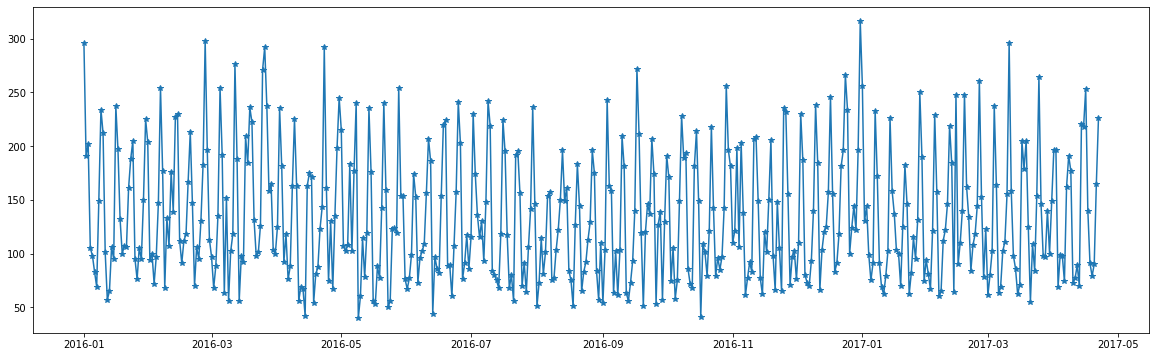

In [ ]:
# Lets take a look at our time series plot
plt.plot(df.index, df['total'], '-*')
plt.show()

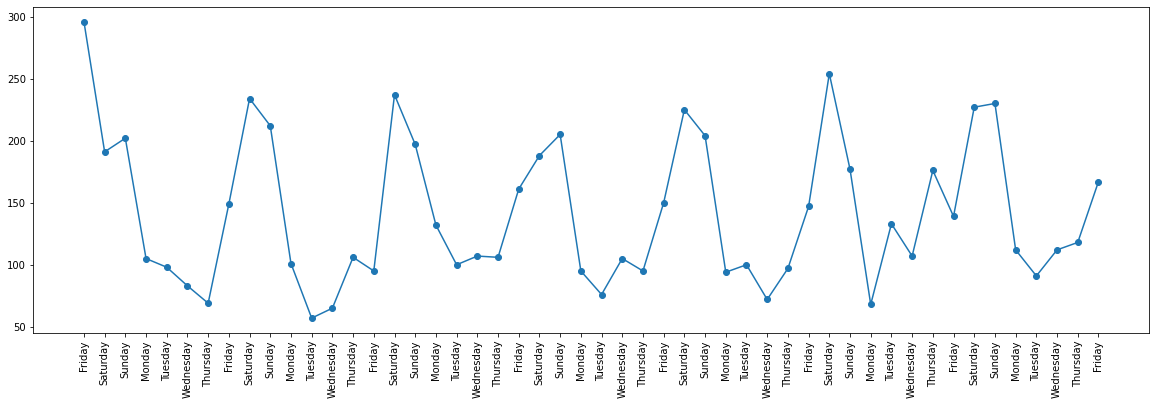

In [ ]:
plt.plot(range(50),df['total'][:50], '-o')
plt.xticks(range(0,50), df['weekday'][:50],rotation = 90)
plt.show()

***Note:***

We can already observe more customers on weekends.

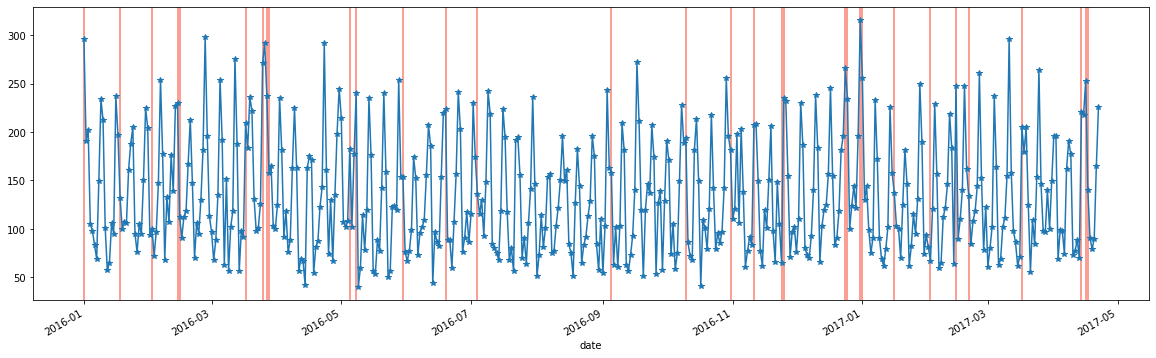

In [ ]:
# Lets take a look at our time series plot
holidays = df.loc[df.holiday==1].index
for hday in holidays:
    plt.axvline(x=hday, color='#FA8072')
df.total.plot(style='-*')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


<Figure size 1440x432 with 0 Axes>

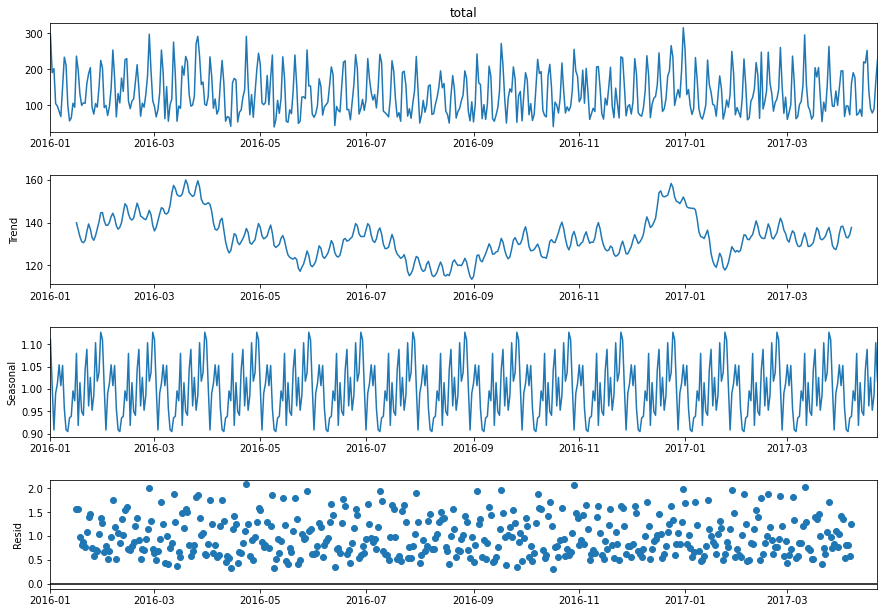

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['total'], model='multiplicative',freq = 30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(12, 9)
fig.show()

***Note:***

The Time Series data is decomposed into Trend, Seasonality and Residuals.

##### Train Test Split:

In [ ]:
train = df.iloc[:436]
test = df.iloc[436:]

##### Model Fitting:

In [ ]:
model = SARIMAX(train['total'],seasonal_order=(1,0,1,7)) # P,D, Q,s
results = model.fit()
fc = results.forecast(42)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


***Note:***

We are using seasonal component directly with $P,D,Q,s \to 1,0,1,7$.

##### Diagnostics Plot:

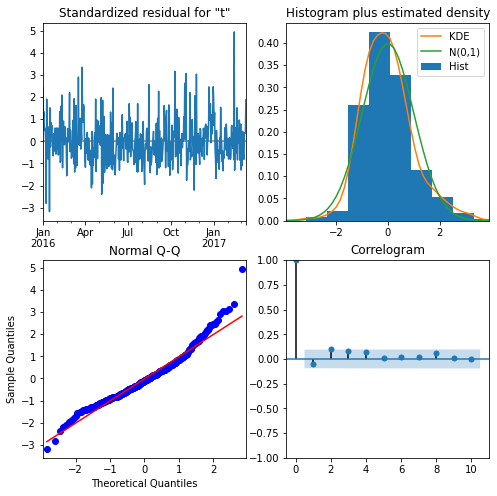

In [ ]:
results.plot_diagnostics(figsize=(8,8));

***Note:***
The Diagnostic plots have 4 components:

***Standardized residual:***
- Plot of residuals with mean of $0$ and a uniform variance.

***Histogram plus KDE estimate:***
- KDE curve of datapoints along with that of a normal distribution $\sim N(0,1)$.

***Normal Q-Q:***
- Quantiles of datapoints in comparison to theoretical quantiles. Most of the data points lie on the straight line.

***Correlogram (ACF plot):***
- 95% of correlations for lag greater than zero should not be significant. The grey area is the confidence band, and if values fall outside of this then they are statistically significant. There are a few values outside of this area, implying that we need to add more features to the model.

##### Model Performance:

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end)

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

MAE : 25.16
RMSE : 31.971
MAPE: 0.202


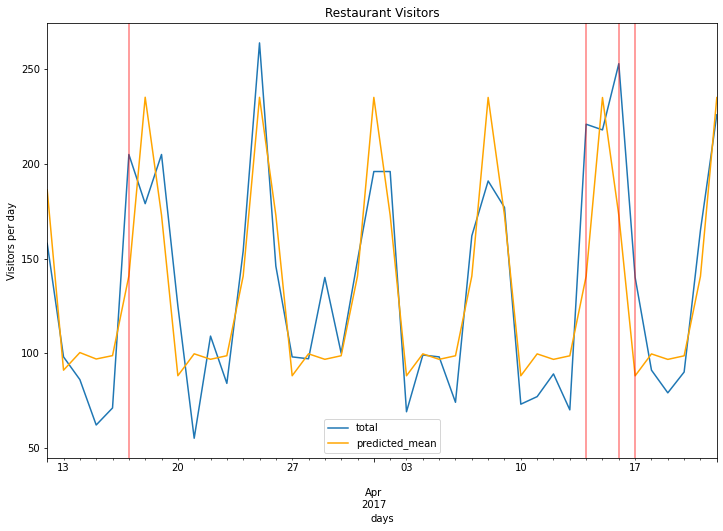

In [ ]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='days'
ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True,color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5)

***Observations:***
- MAPE is $20.2\%$.
- Model does well on capturing seasonality. But the predictions are off on holidays (Vertical lines) apart from weekends.

##### Re-Train using Exogenous Factors:

In [ ]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


***Note:***
- We are using AR component with $p,\delta,q \to 1,0,0$ and seasonal component with $P,D,Q,s \to 1,0,1,7$.
- The feature '$holiday$' in dataset is passed as exogenous component to the model.

In [ ]:
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 18.649
RMSE : 22.93
MAPE: 0.161


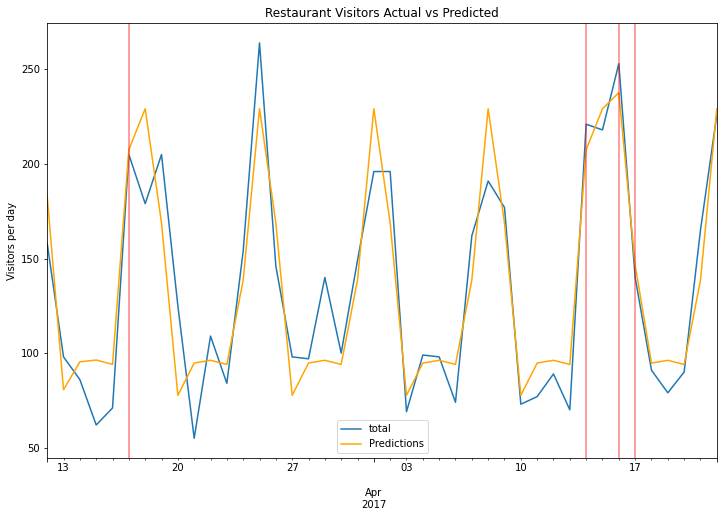

In [ ]:
performance(test['total'], predictions)
# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index:
    ax.axvline(x=x, color='red', alpha = 0.5);

***Observations:***
- MAPE is $16.1\%$.
- Model does well on capturing seasonality as well the predictions are prettry good on holidays as well.

### Time Series forecasting as Linear Regression with innovative features:

- Time Series could be thought of as a Linear Regression problem as well.
- We could include feature interactions or polynomials or even log-transformed features.
  <img src='https://drive.google.com/uc?id=1iOnnh9k4p2_d_bFw3kjrTdPCn9i1dqKP'>
- To begin with, we should do differencing $\to \delta, D$.
- Then build Linear model with $p,q,P,Q$, exogenous variables and feature transformations.
  <img src='https://drive.google.com/uc?id=1xl8npC_BU2UxHTThe9tEU2zvD63cO2MS'>
- We could also use models like XgBoost as well.


### Change Point Detection:

In [ ]:
from IPython.display import Image
Image(url='https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/007/752/original/illustration_of_change_point_detectopn_via_sliding-window.gif?1658421673')

In the above Time Series, there is a particular pattern in the beginning and a sudden change.

For e.g.
- Stock prices of a company might shoot up/plummet after quarterly results.
- Fluctuations in market due to Pandemic.

Simplest way to detect change point is to take moving window or sliding window.

- Imagine we have steady sales in th beginning. Suddenly, sales shoot up due factors mentioned above.
- If we compare mean, variance or standard deviation initially, it would be flat.
  <img src='https://drive.google.com/uc?id=1_Rm7W9aj-97_3sWn16qjr5t4XzGkIZp7'>
- As we move the window to the region of sudden change, the standard deviation increases. As the window continue to move further, standard deviation falls until next peak.
- So peak detection can tell about change detection.

  


#### Typical patterns:

- We could measure change in mean, change in variance, change in periodicity and change in pattern.

<img src='https://drive.google.com/uc?id=179iiMKHFDtCFKmz3dNCUivimonFyZDei'>



#### Practical Approach:

- Imagine we have a Time Series as below.
<img src='https://drive.google.com/uc?id=1EJGkNm1e5nStN9qIhmonR-I5LJoJfe6e'>
- We can take a window of time C1 and get trend lines as window moves and $C_i$ is slope of each window.
- If absolute percentage change in slope is greater than some threshold, then we have found a change pointer.



- In the below graph, we have plotted the mobile sales data and the vertical lines capture change in slope.
<img src='https://drive.google.com/uc?id=1yUOG77aZfFhPbUoDappd_8vpTVUOdDX_'>



### FB Prophet:

- FB-Prophet was created by Facebook Team in 2017.
- This library works with internet scale data. It has all important properties of SARIMAX.

#### Core Idea:

- It builds a decompositional model $ y(t) = g(t) + s(t) + h(t) - \epsilon(t)$, where:
- $g(t) \to$ Trend function, $s(t) \to$ Multiple Seasonalities, $h(t) \to$ holiday and $\epsilon(t) \to$ error term.
  <img src='https://drive.google.com/uc?id=1muimna_sq_vBH9HoZf_ONi2oLAkedU17'>
- $g(t)$ is computed as: $g(t) = \frac{C}{1+exp(-k(t-m))}$.
- It looks like sigmoid function.
- $s(t)$ is computed as:
$$s(t) = \sum_{n=1}^N \bigg(a_n cos\bigg( \frac{2\pi nt}{P}\bigg) \ + \ b_n sin\bigg( \frac{2\pi nt}{P}\bigg) \bigg)$$
- It uses Fourier Transforms for seasonality and hence it can take multiple seasonality.





#### Advantages:

What makes ***FB-Prophet*** more usable than the other available methods ?
- Prophet is a simple library and is great for beginners.
- It works best with time series that have strong seasonal effects.
- Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.
- We can add multiple regressors or exogenous variables.
- It forms a very good baseline model because almost no feature engineering is required.
- ***Interpretability*** is one of the key advantages of Prophet.
- If your timeseries follows some business cycles, you can obtain very decent performance quickly.
- It can also be helpful while detecting changepoints.

#### Performance of FB-Prophet:

- For this model, we have set CI=$95\%$ and asked model to look for yearly and weekly seasonality.
  <img src='https://drive.google.com/uc?id=1t_DfZJYrjaKzbHFX20jx8shhKw1DgyWj'>

- For this model, we have $18.5\% MAPE. It captures seasonality and good predictions for holidays as well.
  <img src='https://drive.google.com/uc?id=1POAPaQTw8hem3w1HIcau-KaqbbuphN9K'>

- This model can also be used for change point detection.
  <img src='https://drive.google.com/uc?id=1yMOx1wZhQj2qpKxxxsIBBud4xGSg_lyi'>